In [2]:
import numpy as np
from numpy import cov,corrcoef
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import curve_fit
import scipy
import pandas as pd

ledd=np.log10(1.3)+38#Eddington luminosity of Solar Mass

In [29]:
agnminus=pd.read_excel('Downloads/fundamental_data/agn.xlsx',sheetname=0)#radio quiet agn minus some data
agnquiet=pd.read_excel('Downloads/fundamental_data/agn.xlsx',sheetname=1)#radio quiet agn data


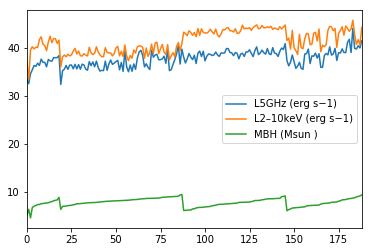

In [31]:
%matplotlib inline
agnminus.plot()


In [51]:
name=agnminus['Name']
radio=agnminus['L5GHz (erg s−1)']
xray=agnminus['L2–10keV (erg s−1)']
mbh=agnminus['MBH (Msun )']
number=len(name)

In [53]:
for i in np.arange(number):
    print(name[i],radio[i],xray[i],mbh[i])

NGC 404 33.5 37.02 5.15636718162
sgrA* 32.5 33.34 6.41
NGC 4395 34.59 39.58 4.6266269384
NGC 4639 35.4035907679 40.18 6.76846284647
NGC 4548 36.3 39.74 7.07519216971
NGC 4138 36.1298733908 40.11 7.19312033403
NGC 4450 36.78 40.02 7.3962479968
NGC 3227 36.31 41.7 7.40983778987
NGC 4235 37.6164580395 42.25 7.60249507491
NGC 5033 36.9438134488 40.7 7.60249507491
NGC 3718 36.96 40.44 7.6871039469
NGC 3031 36.0253054472 39.38 7.72742416968
NGC 4579 37.55 41.15 7.76576474185
NGC 3516 37.28 42.39 7.93618997583
NGC 3169 37.19 41.05 8.01192957721
NGC 3884 37.94 41.89 8.19487532296
NGC 3147 37.91 41.87 8.29383021588
NGC 266 37.95 40.88 8.37415360538
NGC 3998 38.36 41.57 8.89464759014
M32 32.36 36.0 6.4
NGC 3384 35.22 38.09 7.03
NGC 4736 35.51 38.48 7.05
NGC 3675 36.3 38.1 7.1
NGC 2778 35.5 38.64 7.16
NGC 3627 36.37 38.3 7.24
NGC 3628 36.4 38.51 7.24
NGC 3941 35.61 39.27 7.37
NGC 4565 36.55 39.85 7.41
NGC 4698 35.59 38.69 7.57
NGC 4772 36.48 39.3 7.57
NGC 5638 35.52 38.33 7.6
NGC 4762 36.58 38.26

In [39]:
for i in agnminus:
    print(i)

Name
L5GHz (erg s−1)
L2–10keV (erg s−1)
MBH (Msun )
property
ref
agn delte same minus radio loud


In [32]:
agnminus

,Name,L5GHz (erg s−1),L2–10keV (erg s−1),MBH (Msun ),property,ref,agn delte same minus radio loud
0,NGC 404,33.500000,37.02,5.156367,LLAGN LX<LXC,Dong15,ngc 1068
1,sgrA*,32.500000,33.34,6.410000,LLAGN LX<LXC,Dong15,3c 120
2,NGC 4395,34.590000,39.58,4.626627,LLAGN LX>LXC,Dong15,PG 1700+518
3,NGC 4639,35.403591,40.18,6.768463,LLAGN LX>LXC,Dong15,3c 338
4,NGC 4548,36.300000,39.74,7.075192,LLAGN LX>LXC,Dong15,3c 66b
5,NGC 4138,36.129873,40.11,7.193120,LLAGN LX>LXC,Dong15,3c 83.1b
6,NGC 4450,36.780000,40.02,7.396248,LLAGN LX>LXC,Dong15,M84
7,NGC 3227,36.310000,41.70,7.409838,LLAGN LX>LXC,Dong15,pds 456
8,NGC 4235,37.616458,42.25,7.602495,LLAGN LX>LXC,Dong15,mr2251-178
9,NGC 5033,36.943813,40.70,7.602495,LLAGN LX>LXC,Dong15,ngc 5548


In [33]:
agnquiet

,Name,L5GHz (erg s−1),L2–10keV (erg s−1),MBH (Msun ),property,ref
0,NGC 404,33.500000,37.02,5.156367,LLAGN LX<LXC,Dong15
1,sgrA*,32.500000,33.34,6.410000,LLAGN LX<LXC,Dong15
2,NGC 4395,34.590000,39.58,4.626627,LLAGN LX>LXC,Dong15
3,NGC 4639,35.403591,40.18,6.768463,LLAGN LX>LXC,Dong15
4,NGC 4548,36.300000,39.74,7.075192,LLAGN LX>LXC,Dong15
5,NGC 4138,36.129873,40.11,7.193120,LLAGN LX>LXC,Dong15
6,NGC 4450,36.780000,40.02,7.396248,LLAGN LX>LXC,Dong15
7,NGC 3227,36.310000,41.70,7.409838,LLAGN LX>LXC,Dong15
8,NGC 4235,37.616458,42.25,7.602495,LLAGN LX>LXC,Dong15
9,NGC 5033,36.943813,40.70,7.602495,LLAGN LX>LXC,Dong15


In [54]:
np.log(0.012/0.0037)/np.log(5/8.4)

-2.2679026716810813

In [55]:
np.log(0.11/0.104)/np.log(5/1.4)

0.044062041669133058

In [56]:
np.log(0.209/0.104)/np.log(5/1.4)

0.54828136067199706

In [57]:
np.log(0.11/0.104)/np.log(5/1.4)

0.044062041669133058

In [58]:
np.log(0.0021/0.0018)/np.log(1.4/4.8)

-0.1251077144392283

In [59]:
(5/8.5)**-0.5*0.214

0.27902186294267334

In [60]:
(5/8.5)**0*0.214

0.214

In [61]:
(5/1.34)**-0.5*0.5

0.2588435821108957

In [67]:
(5/8.5)**-0.5*0.214

0.27902186294267334

In [65]:
(5/1.4)**-0.5*0.0099

0.005238587595907889

In [66]:
(5/10.7)**-0.5*0.67

0.9801255021679621

In [71]:
(5/8.4)**-0.5*0.24

0.31107555352357724